#BINFA TP3 : modélisation par systèmes dynamiques

On utilisera **matplotlib** pour visualiser les résultats, **numpy** pour gérer les vecteurs et **scipy.integrate** pour simuler des systèmes d'équations différentielles.

##Exercice 1 : Echauffement avec les modèles du cours

### Croissance Exponentielle
Evaluez la croissance d'une population de bactéries pour 60 minutes en utilisant les paramètres suivants : $N_0  = 50$ ; $g=0.2$ min$^{-1}$.

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

**Question 1 :**
Affichez la solution analytique

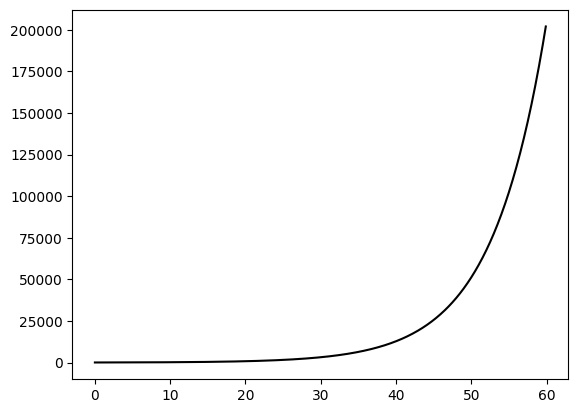

In [59]:
n0 = 50
g = 0.2
pop = []
t = 60

def c(t) :
  return n0 * 2 ** (g * t)

for i in range(t) :
    pop.append(c(i))

ts = np.arange(0, 60, 0.1)

plt.plot(ts, c(ts), 'k')
plt.show()

**Question 2 :**
Simulez une solution en utilisant l'algorithme d'Euler (ecrivez l'algorithme à la main) :

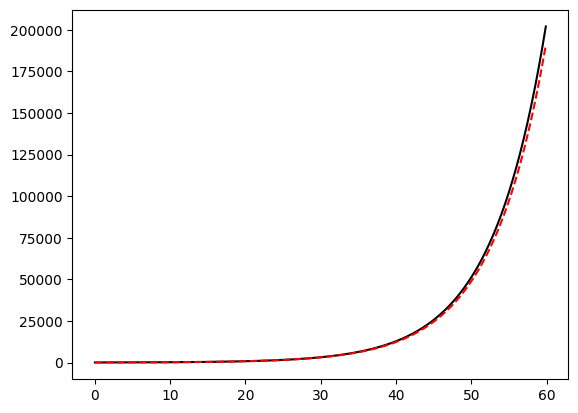

In [60]:
def dcdt(g, c) :
  return np.log(2) * g * c

def euler(f0, tmax, dt, df) :
  res = [f0]
  t = 0
  while t < tmax :
    res.append(res[-1] + df(res[-1]) * dt)
    t += dt
  return np.array(res)

y = euler(n0, t, 0.1, lambda c: dcdt(g, c))

plt.plot(ts, c(ts), 'k')
plt.plot(ts, y[:-1], 'r--')
plt.show()

**Question 3 :** Simulez une solution en utilisant l'algorithme de Runge-Kutta4 (ecrivez l'algorithme à la main)

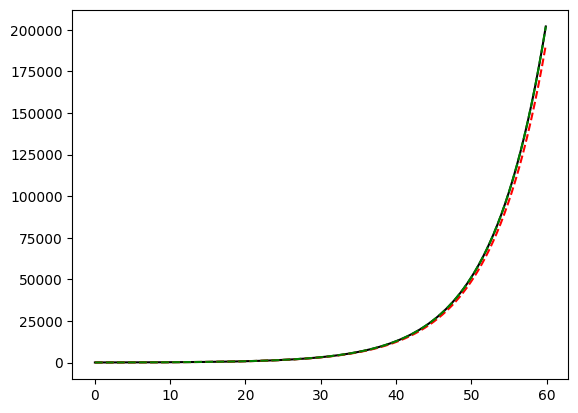

In [61]:
def rk4(f0, tmax, dt, df) :
  res = [f0]
  t = 0
  while round(t - tmax, 4) < 0 :
    k1 = df(res[-1])
    k2 = df(res[-1] + k1 * dt/2)
    k3 = df(res[-1] + k2 * dt/2)
    k4 = df(res[-1] + k3 * dt)
    res.append(res[-1] + (k1 + 2 * k2 + 2 * k3 + k4) * dt/6)
    t += dt
  return np.array(res)

y2 = rk4(n0, t, 0.1, lambda c: dcdt(g, c))

plt.plot(ts, c(ts), 'k')
plt.plot(ts, y[:-1], 'r--')
plt.plot(ts, y2[:-1], 'g--')
plt.show()

**Question 4 :** c.	Pour les questions 2 et 3, comparez les effets de différents pas de temps.

In [62]:
print("Votre code ici !")

Votre code ici !


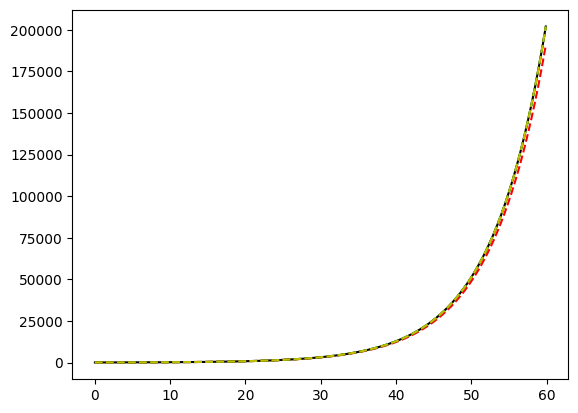

In [63]:
class Growth:
  def __init__(self, g):
    self.g = g

  def dcdt(self, t, c):
    return np.log(2) * self.g * c

gr = Growth(g)

ts2 = np.arange(0, 60, 0.1)
res = solve_ivp(gr.dcdt, [ts2[0], ts2[-1]], [n0], max_step=0.1)

plt.plot(ts, c(ts), 'k')
plt.plot(ts, y[:-1], 'r--')
plt.plot(ts, y2[:-1], 'g--')
plt.plot(res.t, res.y[0, :], 'y--')
plt.show()

## Croissance logistique

Evaluez la croissance d'une population de bactéries pour 60 minutes en considérant qu'elle suit une croissance logistique de paramètres : $N_0  = 0.1$, $r_{max} = 0.2$ min$^{-1}$, $K = 3$.

**Question 5 :** Affichez la solution analytique.

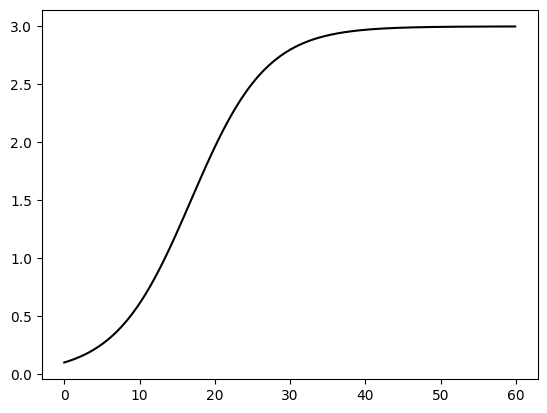

In [64]:
from math import exp

N0 = 0.1
rmax = 0.2
K = 3
t = 60

def c(t) :
  return K / (1 + (K / N0 - 1) * np.exp( - rmax * t))

ts = np.arange(0, 60, 0.1)

plt.plot(ts, c(ts), 'k')
plt.show()

**Question 6 :** Simulez une solution en utilisant l'algorithme d'Euler (ecrivez l'algorithme à la main).

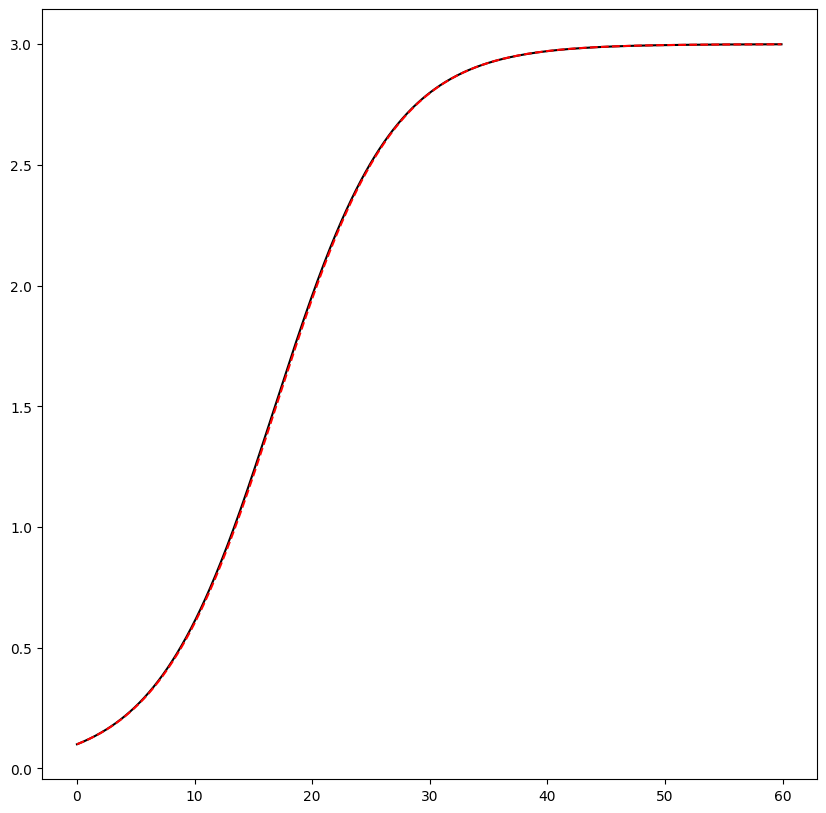

In [73]:
def dcdt(rmax, K, c) :
  return rmax * c * ((K - c) / K)

y = euler(N0, t, 0.1, lambda c: dcdt(rmax, K, c))

plt.figure(figsize=(10, 10))
plt.plot(ts, c(ts), 'k')
plt.plot(ts, y[:-1], 'r--')
plt.show()

## Modèle de Lokta-Volterra

**Question 6 :** 1.	Simulez une trajectoire du modèle pour 50 minutes en utilisant les paramètres : $\alpha = \beta = \gamma = \delta = 0.5$ min$^{-1}$.

In [66]:
a = b = 0.5

def dxdt(a, x, y) :
  return a * x - a * x * y

def dydt(b, x, y) :
  return a * x * y - b * y

df_dt = lambda x, y: np.array([dxdt(a, x, y), dydt(b, x, y)])

res = solve_ivp()

**Question 7 :** Observez la trajectoire dans l'espace de phase (x,y).

In [67]:
print("Votre code ici !")

Votre code ici !


**Question 8 :** Testez d'autres combinaisons de paramètres et essayez de trouver différents comportements du système (autres qu'oscillant). A chaque fois, affichez les trajectoires en fonction du temps et dans l'espace de phase.

In [68]:
print("Votre code ici !")

Votre code ici !


##Exercice 2: Modèle Répressilateur

Le répressilateur est un système génétique inventé dans les années 2000 permettant d'exprimer des gènes de manières oscillantes. L'article décrivant le système est disponible ici https://www.nature.com/articles/35002125.

Cet article est intéressant car il combine une partie expérimentale et une partie de modélisation.

**Question 1 :** Familiarisez-vous avec l'article.

**Question 2 :** Ecrivez le système d'équations différentielles modélisant le système en utilisant les informations fournies dans la « Box 1 » du papier.

**Question 3 :** Simulez une solution du système avec RK4 (**en utilisant solve_ivp de scipy.integrate**) en utilisant les paramètres : $\alpha = 400$, $\alpha_0 =5e-4$, $\beta=5$ et $n=2$.

In [69]:
alpha = 400
a0 = 5e-4
beta = 5
n = 2

def df_dt(alpha, a0, beta, n, t, mlacl, mtetr, mcl, pcl, placl, ptetr) :
  return np.array([

  ])

  solve_ivp()

Votre code ici !


**Question 4 :** Que représente la Figure 1b ? Simulez le système en choisissant des paramètres dans différentes régions du graphe.

In [70]:
print("Votre code ici !")

Votre code ici !


##Exercice 3: Modèle de Schnider

Dans les années 2000, le domaine de l'anesthésiologie a vécu une révolution avec le développement de système d'infusion automatique, aussi appelés « pousses-seringues ». Cette avancée a été permise par le développement et la calibration dans les années 90 de modèles permettant d'évaluer la concentration en agents anesthésique dans le cerveau des patients.

Cette concentration n'est pas triviale à déterminer car l'agent est injecté en intraveineuse et doit se propager jusqu'à son site d'effet : cerveau mais peut être absorbé par d'autres organes à la place. Le modèle de Schnider est un modèle à compartiment composé des éléments suivant :

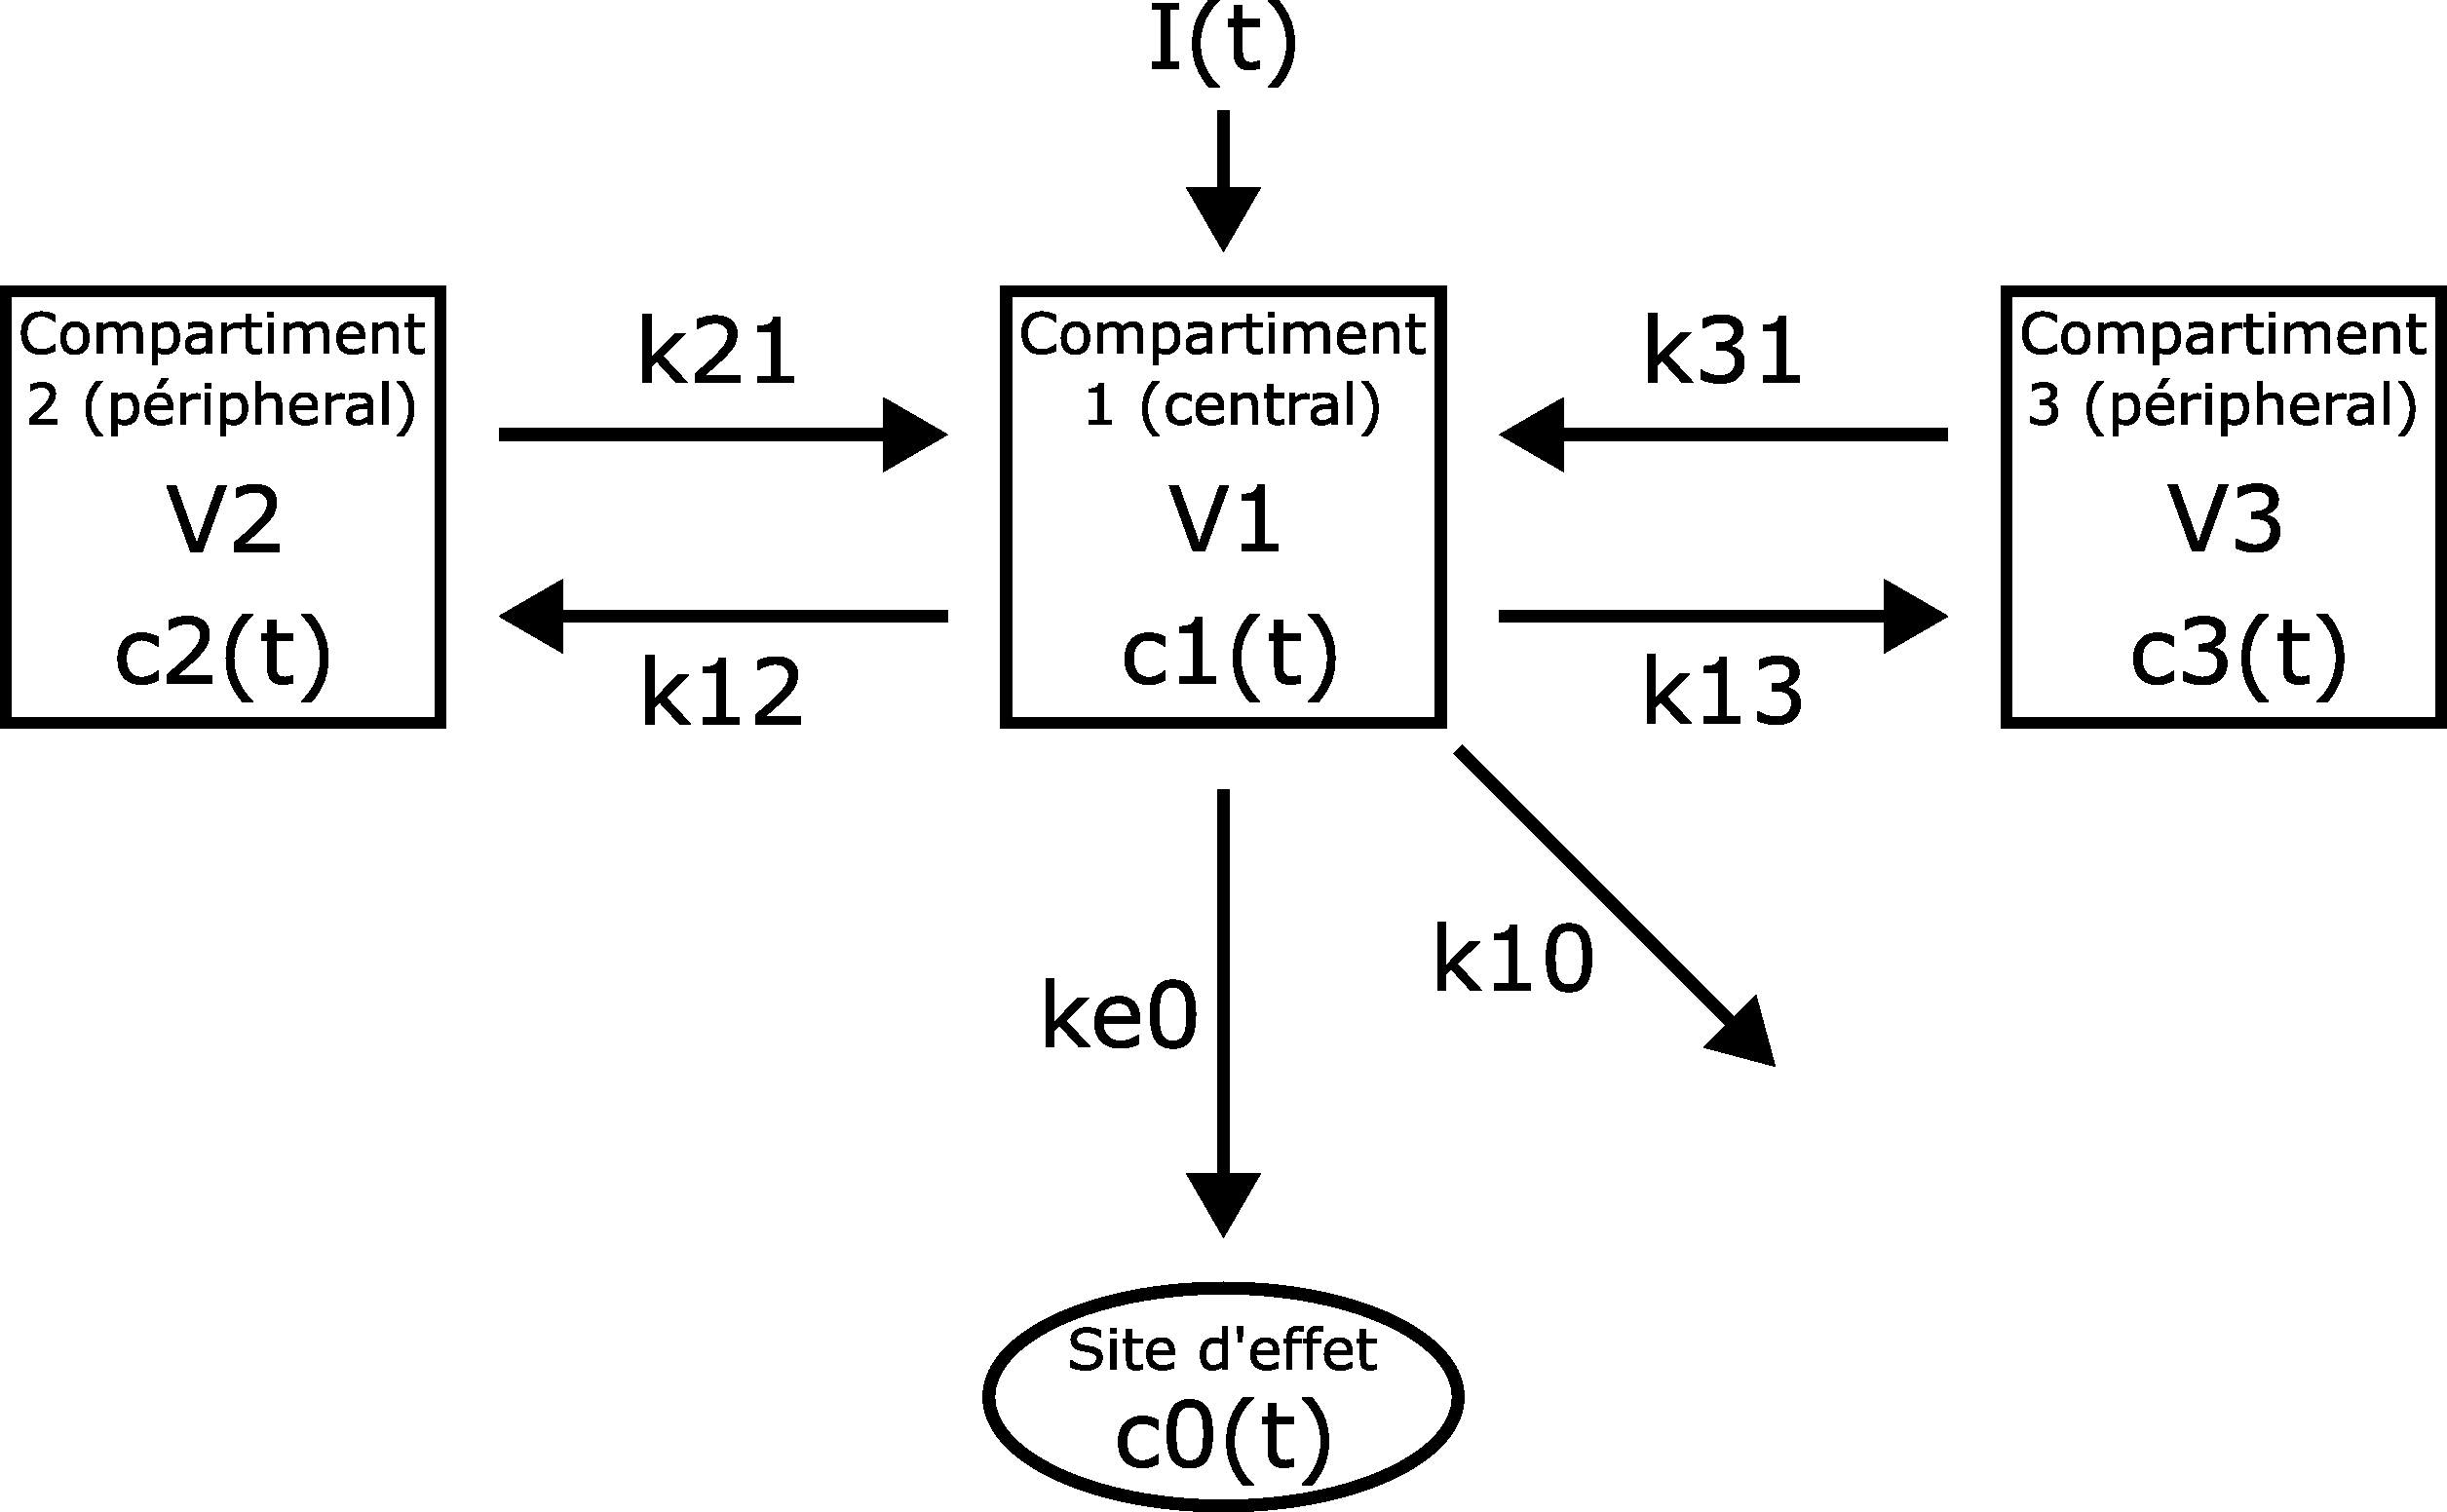

Ou Vn sont des volumes (en litre), kij sont des taux de transfert (en min$^{-1}$) et $I$ (en mg) représente la quantité d'anesthésiant injecté en fonction du temps. Notez que k10 est un terme de dégradation. Les variables du système sont ici les concentrations en propofol en fonction du temps $c_0(t),c_1(t),c_2(t),c_3(t)$ (en mg/L) dans chacun des compartiments.

**Question 1 :** Expliquer le schéma ci-dessus.

**Question 2 :** Ecrire le système d'équations différentielles modélisant ce système.

**Question 3 :** Les paramètres du système sont donnés en fonction de l'âge $a$, du poids $w$ en kg, de la taille $h$ en cm, et de la masse sèche $m_S$ du corps :

Paramètre [unité]  | Valeur &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
--------------------|---------------------------
V1 [L]              | $4.27$
V2 [L]              | $18.9 - 0.391(a - 53)$
V3 [L]              | $238$
K10 [min$^{-1}$]    | $0.443 + 0.0107(w-77) - 0.0159(m_S-59) + 0.0062(h-177)$
K12 [min$^{-1}$]    | $0.302 - 0.0056(a - 53)$
k13 [min$^{-1}$]    | $0.196$
k21 [min$^{-1}$]    | $\frac{1.29 - 0.024(a- 53)}{18.9 - 0.391(a -53)}$
k31 [min$^{-1}$]    | $0.0035$
ke0 [min$^{-1}$]    | $0.456$

La masse sèche est donnée par:

* homme : $m_S = 1.10w - 128 \frac{w^2}{h^2}$
* femme : $m_S = 1.07w - 148 \frac{w^2}{h^2}$


Calculez les valeurs des différent paramètres pour une femme de 63 ans mesurant 160 cm et pesant 60 kg.

**Question 4 :** Simulez le modèle pour la patiente ci-dessus pendant 50 minutes pour une injection en « bolus » (injection rapide d'une dose) de 200 mg d'anesthésiant à t=0.

Notes:
1. Faites attention que les taux de transition sont en min$^{-1}$ alors que les quantités dans chaque compartiment sont des concentrations en mg/L, du coup les termes d'échange entre compartiment doivent être normalisé. Pour ce faire, on va diviser la concentration du compartiment donneur par celle du compartiment accepteur, par exemple pour une transition 2 -> 1, on échange V2 / V1 avec un taux k21. Cela ne s'applique cependant pas au site d'effet qui n'a pas de volume et au terme de dégradation.

2. Comme on considère qu'on inject $I(0) = 200$ mg de propofol au départ de la simulation, on peut s'en tirer sans considérer $I$ dans notre système. A la place, on considère une concentration initiale correspondante dans le compartiment 1.  

In [71]:
print("Votre code ici !")

Votre code ici !
